In [6]:
# Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


## Importing Excel data 

In [7]:
# path for the dataset 
path = '/home/ubuntu/dataScienceAndMachineLearning/pythonForMachineLearningAndDataScience/week_08/day_03/Data_Train.xlsx'

In [8]:
train_data = pd.read_excel(path, engine='openpyxl')

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Shape of dataframe

In [10]:
train_data.shape

(10683, 11)

## Missing Values

In [11]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [12]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Droping missing Values

In [13]:
train_data.dropna(inplace = True)

In [14]:
train_data.isna().sum() ## if there any missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Types of feature in our dataframe 

In [15]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## changing columns which is object to Date Time 

In [16]:
def change_to_datetime(column):
    train_data[column] = pd.to_datetime(train_data[column])

In [17]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

/tmp/ipykernel_4147/311822667.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[column] = pd.to_datetime(train_data[column])
/tmp/ipykernel_4147/311822667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[column] = pd.to_datetime(train_data[column])
/tmp/ipykernel_4147/311822667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[column] = pd.to_datetime(train_data[column])


In [19]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month

In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-06 05:50:00,2024-05-06 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-05-06 18:05:00,2024-05-06 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-05-06 16:50:00,2024-05-06 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [22]:
train_data.drop('Date_of_Journey', axis = 1, inplace = True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-05-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-06 05:50:00,2024-05-06 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-05-06 18:05:00,2024-05-06 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-05-06 16:50:00,2024-05-06 21:35:00,4h 45m,1 stop,No info,13302,1,3


## Extract hour, minute, and drop column 

In [24]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_minute(df, col):
    df[col + '_minute'] = df[col].dt.minute

def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

In [25]:
extract_hour(train_data, 'Dep_Time')
extract_minute(train_data, 'Dep_Time')

extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')

In [26]:
drop_column(train_data, 'Dep_Time')
drop_column(train_data, 'Arrival_Time')

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
duration = list(train_data['Duration'])


In [29]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 

In [30]:
train_data['Duration'] = duration

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Separate_hour_minute_from_duration

In [32]:
def hour(x):
    return x.split(' ')[0][:-1]

def minute(x):
    return x.split(' ')[1][:-1]

In [33]:
train_data['Duration_hour'] = train_data['Duration'].apply(hour)
train_data['Duration_minute'] = train_data['Duration'].apply(minute)

In [34]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [35]:
train_data.drop('Duration', axis = 1,  inplace = True)

In [36]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [37]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hour          object
Duration_minute        object
dtype: object

In [38]:
train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_minute'] = train_data['Duration_minute'].astype(int)

In [39]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hour           int64
Duration_minute         int64
dtype: object

## Fetch Object Column

In [40]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [41]:
con_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
con_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute']

# Handle Categorical data and perforn feature encoding technique

<b> Nominal Data </b>: Nominal Data are those data which is basically not in order. For example: The name of country. The country name does not have any hierarchy. 

For Nominal Data: We have to perform, one hot encoding

<b> Ordinal Data </b>: Ordinal Data are those data which have some kind of hierarchy. For example: Good, Better, Best. 

For Ordinal dadta: We have to perform, label encoding class

In [42]:
categorical_data = train_data[cat_col]
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### Perform one hot encoding on Airline Column

<Axes: xlabel='Airline', ylabel='Price'>

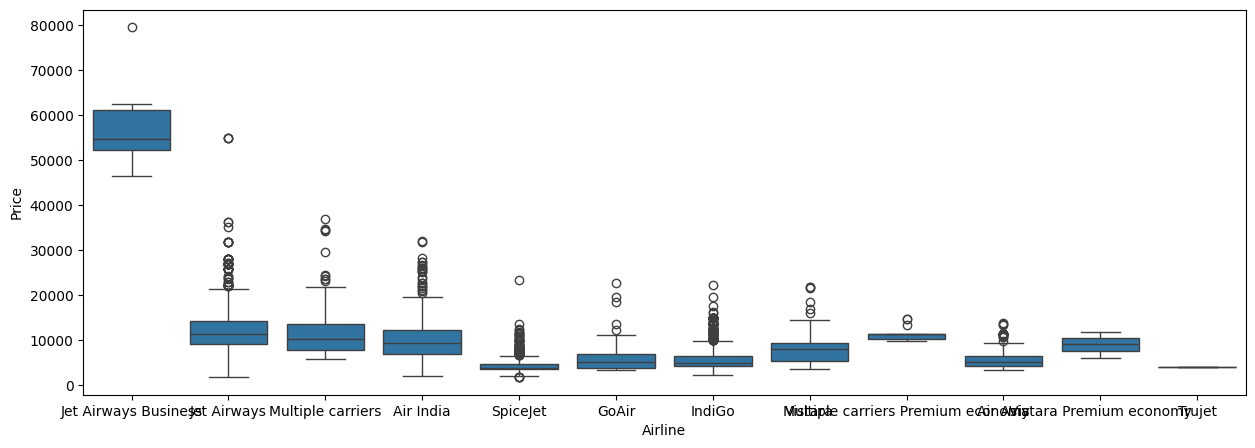

In [44]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

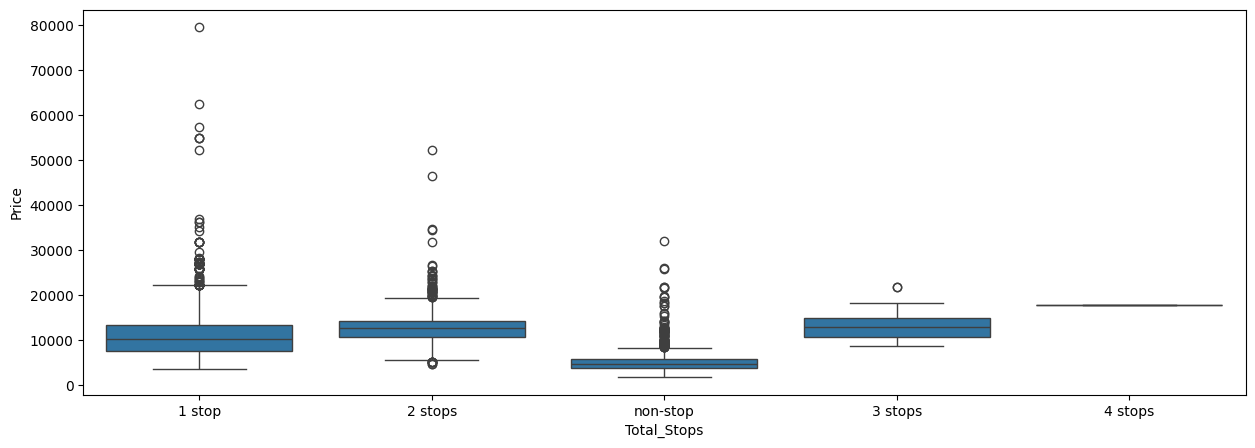

In [45]:
plt.figure(figsize = (15, 5))

sns.boxplot(x= 'Total_Stops', y = 'Price', data = train_data.sort_values('Price', ascending = False ))

In [46]:
Airline = pd.get_dummies(categorical_data['Airline'], drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


### Perform One hot encoding in Soruce Column

In [47]:
categorical_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

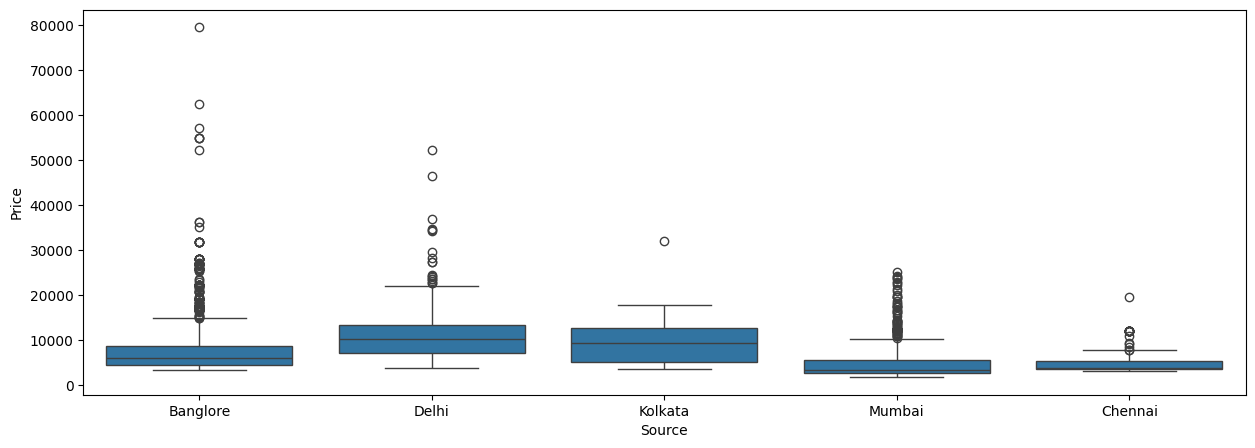

In [48]:
plt.figure(figsize = (15, 5 ))

sns.boxplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending = False))

In [49]:
Source = pd.get_dummies(categorical_data['Source'], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


## Perform One hot encoding in Destination Column

In [50]:
categorical_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

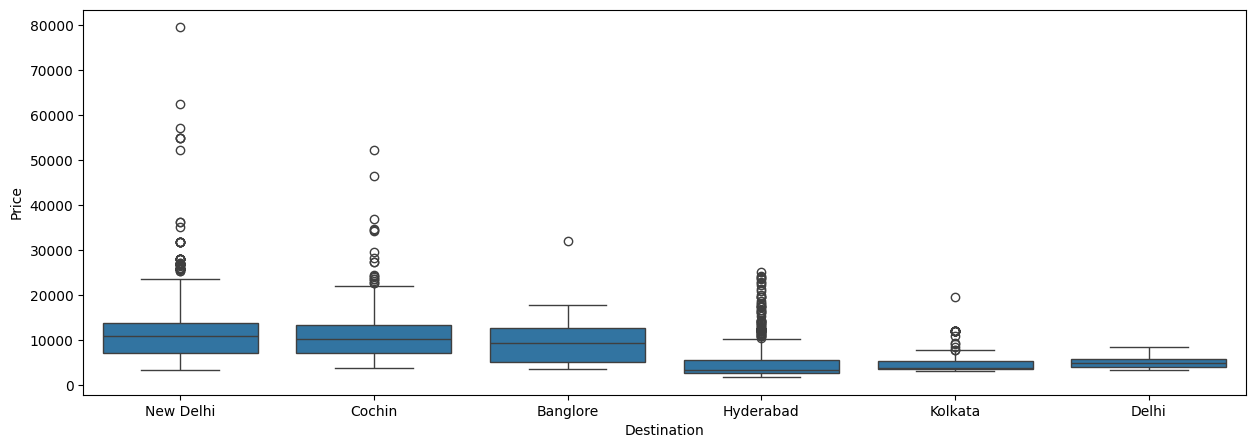

In [51]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending = False))

In [52]:
Destination = pd.get_dummies(categorical_data['Destination'], drop_first  = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


## Handling Route Column 

In [53]:
categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_03'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_04'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_05'] = categorical_data['Route'].str.split('→').str[4]

/tmp/ipykernel_4147/4047610307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
/tmp/ipykernel_4147/4047610307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
/tmp/ipykernel_4147/4047610307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [54]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [55]:
categorical_data.drop('Route', axis = 1 , inplace = True)

/tmp/ipykernel_4147/3242636670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data.drop('Route', axis = 1 , inplace = True)


In [56]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [57]:
categorical_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_01               0
Route_02               0
Route_03            3491
Route_04            9116
Route_05           10636
dtype: int64

In [58]:
for i in ['Route_03', 'Route_04', 'Route_05']:
    categorical_data[i].fillna('None', inplace = True)

/tmp/ipykernel_4147/3320192063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_data[i].fillna('None', inplace = True)
/tmp/ipykernel_4147/3320192063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i].fillna('None', inplace = True)


In [59]:
categorical_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_01           0
Route_02           0
Route_03           0
Route_04           0
Route_05           0
dtype: int64

In [60]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [61]:
for i in categorical_data.columns:
    print('{} has total {} categories'.format(i, len(categorical_data[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_01 has total 5 categories
Route_02 has total 45 categories
Route_03 has total 30 categories
Route_04 has total 14 categories
Route_05 has total 6 categories


In [62]:
categorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()

In [65]:
for i in ['Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05']:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])

/tmp/ipykernel_4147/914110698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i] = encoder.fit_transform(categorical_data[i])
/tmp/ipykernel_4147/914110698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i] = encoder.fit_transform(categorical_data[i])
/tmp/ipykernel_4147/914110698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [66]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [67]:
categorical_data.drop('Additional_Info', inplace = True, axis = 1)

/tmp/ipykernel_4147/1637126225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data.drop('Additional_Info', inplace = True, axis = 1)


In [68]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [69]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [70]:
categorical_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [71]:
dict_route = {'non-stop':0, 
              '2 stops':2, 
              '1 stop':1, 
              '3 stops':3, 
              '4 stops':4 }

In [72]:
dict_route

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [73]:
categorical_data['Total_Stops'] =  categorical_data['Total_Stops'].map(dict_route)

/tmp/ipykernel_4147/2006076008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Total_Stops'] =  categorical_data['Total_Stops'].map(dict_route)


In [74]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [75]:
categorical_data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [76]:
train_data = pd.concat([categorical_data, Airline, Source, Destination, train_data[con_col]], axis = 1)

In [77]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,False,...,True,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,True,...,False,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,False,...,False,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,False,...,False,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,False,...,True,13302,1,3,16,50,21,35,4,45


In [78]:
train_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [79]:
train_data.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,16,50,21,35,4,45


## To see all the 35 columns 

In [80]:
pd.set_option('display.max_columns', 35)

In [81]:
train_data.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,13302,1,3,16,50,21,35,4,45


## Outlier Detection and outlier imputation if available in our data

In [82]:
def plot(df, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

/tmp/ipykernel_4147/3995815586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax1)


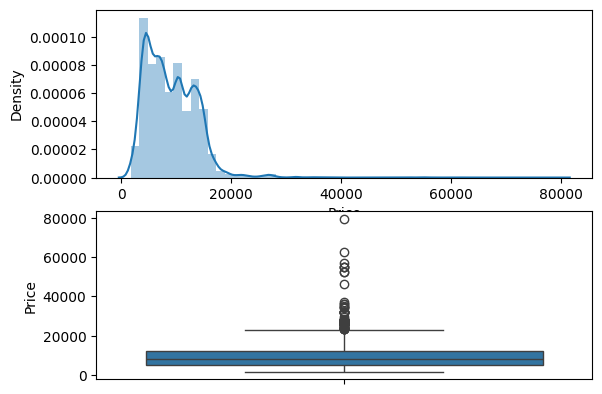

In [83]:
plot(train_data, 'Price')

In [84]:
train_data['Price'] = np.where(train_data['Price'] >= 40000, train_data['Price'].median(),train_data['Price'])

/tmp/ipykernel_4147/3995815586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax1)


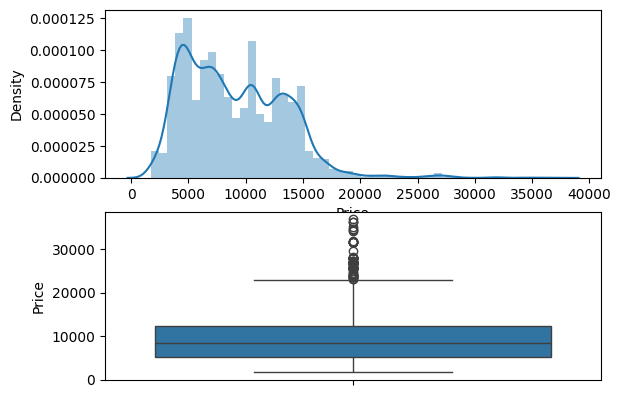

In [85]:
plot(train_data, 'Price')